In [5]:
# 使用stapep.generate_template生成非标准氨基酸的参数模版
# --smiles: 非标准氨基酸的SMILES，需要包括主链上的COOH和NH2
# --name: 生成的模板的名字，必须是大写的3个字符
# --output: 输出路径，如果没有指定，默认为当前目录的name文件夹里
# --charge: 非标准氨基酸的电荷，如果没有指定，默认为0.0

# Using stapep.generate_template to generate parameter templates for non-standard amino acids
# --smiles: SMILES of the non-standard amino acid, including COOH and NH2 on the main chain
# --name: The name of the generated template, must be three uppercase characters
# --output: Output path, if not specified, it will default to the name folder in the current directory
# --charge: The charge of the non-standard amino acid, if not specified, it will default to 0.0

aa_name = "E1P"

!python -m stapep.generate_template \
    --smiles "N[C@@H](CCOP(=O)(O)O)C(=O)O" \
    --name "E1P" \
    --output "./data/E1P" \
    --charge 0.0

args.smiles: N[C@@H](CCOP(=O)(O)O)C(=O)O
obabel -ismi E1P.smi -osdf -O E1P.sdf --gen3D
1 molecule converted
antechamber -fi sdf -i E1P.sdf -bk E1P -fo ac -o E1P.ac -c bcc -at amber

Welcome to antechamber 22.0: molecular input file processor.

Info: acdoctor mode is on: check and diagnose problems in the input file.
Info: The atom type is set to amber; the options available to the -at flag are
      gaff, gaff2, amber, bcc, and sybyl.

-- Check Format for sdf File --
   Status: pass
-- Check Unusual Elements --
   Status: pass
-- Check Open Valences --
   Status: pass
-- Check Geometry --
      for those bonded   
      for those not bonded   
   Status: pass
-- Check Weird Bonds --
   Status: pass
-- Check Number of Units --
   Status: pass
acdoctor mode has completed checking the input file.

sh: /home/dahuilangda/Simulation/miniconda3/envs/stap/lib/libtinfo.so.6: no version information available (required by sh)
/bin/bash: /home/dahuilangda/Simulation/miniconda3/envs/stap/lib/libtin

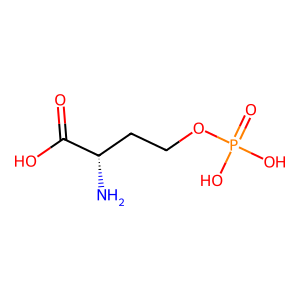

In [6]:
# 非标准氨基酸需要提供的结构如下所示
# The structure of the non-standard amino acid is as follows

from rdkit import Chem
from rdkit.Chem import Draw

smiles = "N[C@@H](CCOP(=O)(O)O)C(=O)O"
molecule = Chem.MolFromSmiles(smiles)
Draw.MolToImage(molecule)

In [8]:
from stapep.structure import Structure

additional_residues = {
    aa_name: (
        f'data/{aa_name}/{aa_name}.prepin',
        f'data/{aa_name}/frcmod.{aa_name}',
    )
}

seq = 'S-E1P-KLRQLLF' # Define the peptide sequence
st = Structure(verbose=True) # Initialize the structure class
st.de_novo_3d_structure(seq=seq, output_pdb=f'data/{aa_name}_peptide.pdb', additional_residues=additional_residues)

Some weights of EsmForProteinFolding were not initialized from the model checkpoint at facebook/esmfold_v1 and are newly initialized: ['esm.contact_head.regression.weight', 'esm.contact_head.regression.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
INFO:parmed.structure:Adding bonds...
INFO:parmed.structure:Adding angles...
INFO:parmed.structure:Adding dihedrals...
INFO:parmed.structure:Adding Ryckaert-Bellemans torsions...
INFO:parmed.structure:Adding Urey-Bradleys...
INFO:parmed.structure:Adding improper torsions...
INFO:parmed.structure:Adding CMAP torsions...
INFO:parmed.structure:Adding trigonal angle terms...
INFO:parmed.structure:Adding out-of-plane bends...
INFO:parmed.structure:Adding pi-torsions...
INFO:parmed.structure:Adding stretch-bends...
INFO:parmed.structure:Adding torsion-torsions...
INFO:parmed.structure:Adding Nonbonded force...
INFO:parmed.structure:Adding GB force...


-I: Adding /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/prep to search path.
-I: Adding /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/lib to search path.
-I: Adding /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/parm to search path.
-I: Adding /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/cmd to search path.
-f: Source tleap.in.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./tleap.in
----- Source: /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/cmd/leaprc.protein.ff14SB
----- Source of /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/cmd/leaprc.protein.ff14SB done
Log file: ./leap.log
Loading parameters: /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/parm/parm10.dat
Reading title:
PARM99 + frcmod.ff99SB + frcmod.parmbsc0 + OL3 for RNA
Loading parameters: /home/dahuilangda/Simulation/miniconda3/envs/stap/dat/leap/parm/frcmod.ff14SB
Reading force field modification type file (frcmod)
Reading ti

INFO:root:Running short time simulation for 100000 steps


Minimizing...
Running...


ValueError: Energy is NaN

In [5]:
# Install py3Dmol: 
# mamba install -c conda-forge py3dmol
# mamba install -c conda-forge jupyterlab
# mamba install -c conda-forge nodejs
# jupyter labextension install jupyterlab_3dmol

import py3Dmol
 
p = py3Dmol.view(query=f'data/{aa_name}_peptide.pdb')
# 整体显示卡通的同时，显示R1A的球棒模型
p.setStyle({}, {'cartoon': {'color': 'spectrum'}})
p.setStyle({'resn': 'R1M'}, {'cartoon': {'color': 'spectrum'}, 'stick': {}})
p.zoomTo()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol